### K Nearest Neighbors scikit learn

In [72]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sb

from sklearn.cross_validation import train_test_split
import statsmodels.api as sm 

import sklearn.metrics as skm

from sklearn.neighbors import KNeighborsRegressor
#class sklearn.neighbors.KNeighborsRegressor(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=1, **kwargs)

In [73]:
feat = pd.read_pickle('features.pkl')
feat.columns
#feat.info()

Index(['FIPS', 'CountyName', 'perc_in_labor_frc', 'perc_in_armfrc',
       'p_com_carpool', 'p_com_workhome', 'perc_occ_mgt', 'perc_occ_svc',
       'p_ind_whlesl', 'p_ind_info', 'p_ind_FIRE', 'p_ind_waste',
       'p_ind_edsvc', 'p_ind_pubadm', 'ln_popdens', 'ln_housedens',
       'p_nonfamily', 'p_marrfam', 'p_malehh', 'p_femhh', 'avg_hh_size',
       'fert_age15_19', 'fert_age20_34', 'fert_age35_50', 'p_highsch',
       'p_bachdeg', 'p_civvet', 'p_civdis_18', 'p_civdis_1864', 'p_civdis_65',
       'p_samehouse', 'p_diffhousUS', 'p_abroad1yr', 'p_nativeUS',
       'p_nativestate', 'p_nat_citz', 'p_spk_engl', 'PercBelowPov', 'pov_bins',
       'pov_bin'],
      dtype='object')

In [75]:
X = feat[['perc_in_labor_frc',
      'perc_in_armfrc', 'p_com_carpool', 'p_com_workhome', 'perc_occ_mgt',
       'perc_occ_svc', 'p_ind_whlesl', 'p_ind_info', 'p_ind_FIRE',
       'p_ind_waste', 'p_ind_edsvc', 'p_ind_pubadm', 'ln_popdens', 'ln_housedens',
       'p_nonfamily', 'p_marrfam', 'p_malehh', 'p_femhh',
       'avg_hh_size', 'fert_age15_19', 'fert_age20_34', 'fert_age35_50',
       'p_highsch', 'p_bachdeg', 'p_civvet', 'p_civdis_18', 'p_civdis_1864',
       'p_civdis_65', 'p_samehouse', 'p_diffhousUS', 'p_abroad1yr',
       'p_nativeUS', 'p_nativestate', 'p_nat_citz', 'p_spk_engl']]

X = sm.add_constant(X)
X = X.fillna(0)

y = feat['PercBelowPov']/100
y = feat['PercBelowPov']

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42)
print(y_train.dtype,len(y_train))
#X_train.info()

float64 2199


In [84]:
## KNeighbors Regressor
neigh = KNeighborsRegressor(n_neighbors=10)
knn = neigh.fit(X_train, y_train)
print(knn.score(X_test,y_test))
print(knn.score(X_train,y_train))



0.49380407533
0.617726163949


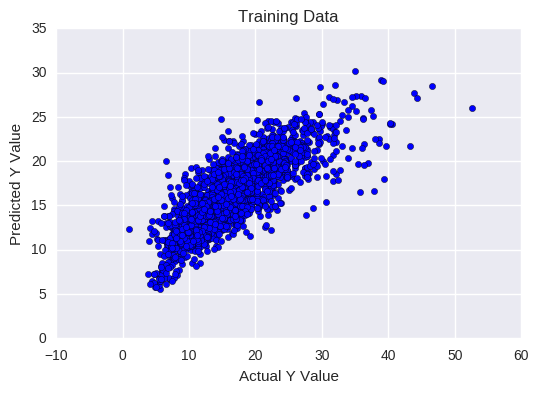

In [87]:
y_pred_train = knn.predict(X_train)
plt.scatter(y_train,y_pred_train)
plt.title('Training Data')
plt.xlabel('Actual Y Value')
plt.ylabel('Predicted Y Value');

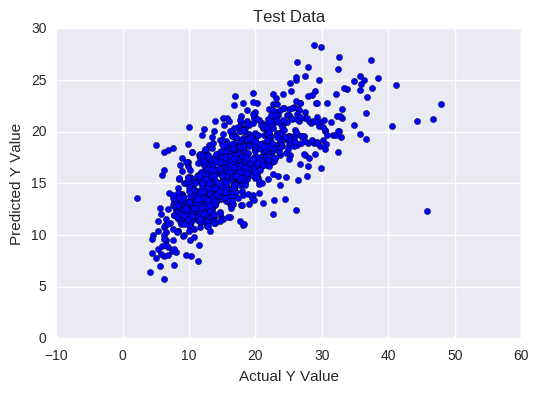

In [88]:
pred_test = knn.predict(X_test)
plt.scatter(y_test,pred_test)
plt.title('Test Data')
plt.xlabel('Actual Y Value')
plt.ylabel('Predicted Y Value');

In [89]:
print ("Mean absolute error = ",
      round(skm.mean_absolute_error(y_test, pred_test), 2))
print ("Mean squared error = ",
      round(skm.mean_squared_error(y_test, pred_test), 2))
print ("Median absolute error = ",
      round(skm.median_absolute_error(y_test, pred_test), 2))
print ("Explained variance score = ",
      round(skm.explained_variance_score(y_test, pred_test), 2))
print ("R-square score = ", 
      round(skm.r2_score(y_test, pred_test), 2))



Mean absolute error =  3.46
Mean squared error =  23.34
Median absolute error =  2.49
Explained variance score =  0.51
R-square score =  0.49


## KNeighborsClassifier

In [90]:
from sklearn.neighbors import KNeighborsClassifier

In [112]:
y = feat['pov_bin']
#y = feat['pov_bins']

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42)
print(y_train.dtype,len(y_train))


int64 2199


In [114]:
neigh = KNeighborsClassifier(n_neighbors=10)
knn = neigh.fit(X_train, y_train)
print(knn.score(X_test,y_test))
print(knn.score(X_train,y_train))



0.780487804878
0.827648931332


In [115]:
print ("Mean absolute error = ",
      round(skm.mean_absolute_error(y_test, pred_test), 2))
print ("Mean squared error = ",
      round(skm.mean_squared_error(y_test, pred_test), 2))
print ("Median absolute error = ",
      round(skm.median_absolute_error(y_test, pred_test), 2))
print ("Explained variance score = ",
      round(skm.explained_variance_score(y_test, pred_test), 2))
print ("R-square score = ", 
      round(skm.r2_score(y_test, pred_test), 2))

Mean absolute error =  0.22
Mean squared error =  0.22
Median absolute error =  0.0
Explained variance score =  0.13
R-square score =  0.12


In [116]:
pred_test = knn.predict(X_test)
pred_prob_test = knn.predict_proba(X_test)

In [124]:
pred_test.shape
pred_test[200,]

0

In [117]:
num_right = 0
for i in range(len(y_test)):
    if y_test.loc[i] == pred_test[i] : num_right += 1
print(num_right + " of " + len(y_test) + "right") 



KeyError: 'the label [1] is not in the [index]'

In [107]:
y_test

TypeError: 'Int64Index' object is not callable